<img src="logo-su-s-nadpis.jpg",width=100,height=100>

<h1><center>Софийски университет „Св. Кл. Охридски”</center></h1>
<h2><center>Факултет по математика и информатика</center></h2>

----

<h3><center>Курсов Проект на тема:</center></h3>

<h2><center>Обобщаване на "за" и "против" определен продукт/марка във форума БГ-Мама (http://www.bg-mamma.com)</center></h2>



Студент: Мария Георгиева Рангелова, Емил Калинов Николов

Факултетен номер:  25784, 25673

Курс: Извличане на информация

Преподавате: проф. Иван Койчев

Дата: София, 2018 г.

### Съдържание

    1. Увод
    2. Използвани технологии и платформи
    3. Данни
    4. Реализация и експерименти
        4.1. Алгоритъм за намиране на най-близките съседи
            4.1.1 Подобрения
        4.2. Наивен Бейсов класификатор
        4.3. Логистична регресия
    5. Заключение

----

# 1. Увод

В днешно време интернет е източник на голямо количество информация. В последните години все повече хора изразяват идеите, мненията и възгледите си в социалните мрежи (напр. Twitter, Facebook, Quora, форуми и т.н.). Защо искаме да знаем какво мислят всички тези хора? Да си представим, че имаме бизнес и предлагаме определен продукт или услуга. В основата на успешния бизнес стоят потребителите и мнението им за продуктът, който получават. Методите за извличане на информация от данни и машинно самообучение ни дават силни инструменти, с помощта на които можем да разберем какво говорят потребителите ни за нас и в частност - дали преобладаващото мнение е положително или отрицателно. Знаейки реакциите нашите купувачи, имаме силно оръжие да провеждаме стратегически насочени маркетинг кампании, да ангажираме повече хора, да работим върху слабите места и да усъвършенстваме още повече силните. Всичко това, разбира се, води до по-големи продажби, което е и крайната цел на всеки един бизнес.
Да разгледаме един пример: Нека фирмата ни е специализирана в сектора за производство на козметика. Наскоро сме изработили нов продукт, който е подкрепен от обемна маркетинг кампания. След анализ на мнението на потребителите, обаче, се оказва, че потребителите изразяват силно негативни мнения заради отрицателно въздействие върху околната среда при производството на продукта. Как тези знания могат да ни помогнат? От една страна, можем да изградим стратегия за получаване на обратна връзка от по-малка аудитория потребители преди да пуснем продуктите си на пазара. В текущата ситуация можем да оттеглим продукта и публично да дарим всички приходи от него на организация или сдружение, борещо се със замърсяванията на околната среда. 

Целта на настоящия проект е да разгледа различни подходи за извличане на информация от данни и машинно самообучение с цел обобщаване на мнението на потребители във форум за определен продукт или услуга. Данните, които ще анализираме са от известен български форум - БГ-Мама (http://www.bg-mamma.com).

# 2. Използвани технологии и платформи

Настоящият проект е реализиран с Python. Използвани са следните библиотеки:
- [pandas](https://pandas.pydata.org) - предоставя бърз и лесен начин за работа с таблични данни
- [numpy](http://www.numpy.org) - мощен инструмент за работа с n-мерни данни
- [matplotlib]() - пакет за визуализация
- [nltk](http://www.nltk.org) - водеща платформа за работа с естествен език и обработка на текст
- [sclearn](http://scikit-learn.org) - предоставя инструменти за анализ и машинно самообучение на данни
- [gensim](https://radimrehurek.com/gensim)- анализира семантичната структура на документи с естествен език
- [bg-mamma](https://github.com/mrangelova/bg-mamma) - пакет, разработен специално за нуждите на проекта. Включва:
    - методи за автоматично сваляне на ревюта и постове от [Амазон](https://www.amazon.com) и [БГ-Мама](http://www.bg-mamma.com) 
    - методи за предварителна обработка на коментари - премахване на излишни символи и  URL-и, превод, stemming, тоукънизация
    - основни класове, изградени около абстракцията за обект, който представлява Ревю на продукт
- вградени библиотеки - os, sys, warnings

По време на реализацията на проекта е използван [Jupyter Notebook](https://jupyter.org) - уеб-базирана платформа, която позволява лесно споделяне на код.

In [99]:
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
sys.path.append(r'/Users/maria/FMI/Information Retrieval/bg-mamma/bg-mamma/')

# 3. Данни

Ще обобщаваме мненията за продуктите на марката *Estee Lauder*. Защо избрахме тази тема:
    - марката е популярна сред потребителите
    - в много от другите теми се обсъждат и сравняват продукти от различни марки
    - продава се навсякъде по света => има мнения и в Amazon


Данните:
Свалихме общо 1374 поста от БГ-Мама. Целта е да определим колко позитивен е всеки коментар.
За да можем да валидираме колко добре се представя класификаторът, който ще построим, сложихме рейтинг (1-5) на всеки пост. Да видим как изглеждат:

In [102]:
from src.reviews import BGMammaReviews

bg_mamma_posts = BGMammaReviews.get()
bg_mamma_posts.head()

,post,rating
0,Коментарна тема за марката и нейните продуктит...,0.0
1,Най-любимия ми продукт на ЕЛ е серум ANR,5.0
2,"Благодаря за темата, Денси Аз не съм пробвала ...",0.0
3,"От това, което съм ползвала от бялата козметик...",5.0
4,"Благодаря за темата! Аз не съм ползвала, но ми...",0.0


Нека разгледаме и разпределението на постовете по рейтинг:

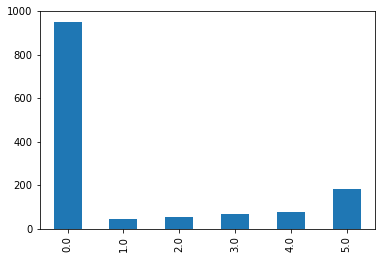

In [33]:
bg_mamma_posts.plot_by_rating()

Оказва се, че много от коментарите не изразяват никакво мнение за продукт. Такива, например, са постове, които целят получаване на допълнителна информация, коментари за текущи промоции, и т.н. Тези коментари са обозначени с рейтинг 0 и няма да се използват при изчисляването на точността на класификатора. Можем да видим произволен такъв пример:

In [97]:
bg_mamma_posts.iloc[np.random.choice(bg_mamma_posts[bg_mamma_posts.rating == 0].index)]['post']

'Блазни ме това намаление, но ще видя дали ще купя нещо. Аз друг път получавах СМСи, но за това намаление не съм, видях случайно във фейсбук. Дали са спрели СМС известяването?'

Махаме всички постове, които не изразяват конкретно мнение за продуктите на *Estee Lauder*. Ето новто разпределението по рейтинг:

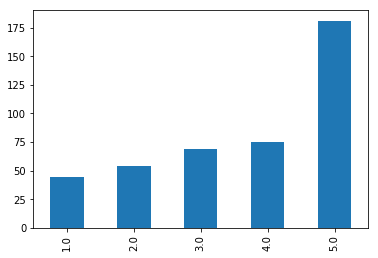

In [9]:
bg_mamma_posts.remove_irrelevant_posts()
bg_mamma_posts.plot_by_rating()

За да построим модел, който класифицира един пост като позитивен, негативен или неутрален, ще използваме ревюта за продукти от същата марка, които ще свалим от Амазон.

In [103]:
from src.reviews import AmazonReviews

amazon_reviews = AmazonReviews.get()
print('Брой ревюта: {}'.format(amazon_reviews.shape[0]))
amazon_reviews.head()

Брой ревюта: 6865


,post,rating
0,Not sure if this was legit product...container...,2.0
1,This is the best sample from Estee Lauder. It'...,5.0
2,"Perfect size for air-plane travel, does the jo...",5.0
3,It's realy worked. My skine smooth and clean. ...,5.0
4,Feels so great on my face. I love the smell,4.0


Разполагаме с 6865 ревюта от Амазон. Възможно е да има лиспващи стойности в тези данни. Да проверим:

In [11]:
any(amazon_reviews.isnull())

True

Нека се отървем от записите, в които липсва пост или рейтинг.

In [12]:
amazon_reviews = AmazonReviews(amazon_reviews.dropna())
amazon_reviews.shape

(6864, 2)

Записите намаляха само с 1 и не си струва да търсим каква е била причината той да има липсваща стойност.

Да разгледаме и разпределението на ревютата от Амазон по рейтинг:

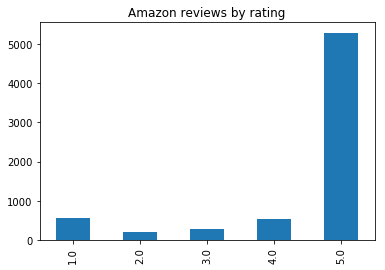

In [14]:
amazon_reviews.plot_by_rating('Amazon reviews by rating')

Както в данните от БГ-Мама, така и тук, имаме преобладаващ рейтинг '5'. Да видим какво ще се случи ако не тренираме модели и зададем на всички постове рейтинг 5:

In [18]:
from sklearn.metrics import accuracy_score, classification_report

print('Accuracy: ', accuracy_score(bg_mamma_posts.rating, [5] * bg_mamma_posts.shape[0]))
print(classification_report(bg_mamma_posts.rating, [5] * bg_mamma_posts.shape[0]))

Accuracy:  0.427895981087
             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00        44
        2.0       0.00      0.00      0.00        54
        3.0       0.00      0.00      0.00        69
        4.0       0.00      0.00      0.00        75
        5.0       0.43      1.00      0.60       181

avg / total       0.18      0.43      0.26       423



Целта ни е да подобрим тези метрики.

# 4. Реализация

## 4.1 Алгоритъм за намиране на най-близки съседи

Ще разгледаме един сравнително нов подход за анализиране на мнението на потребители от форум. За целта ще използваме *word2vec*. *word2vec* е група Deep Learning модели, разработени от Гугъл. Основната цел е да се улови контекста, в който дадена дума се използва. Входните данни обикновено са голям корпус от документи - новини, статии, постове в различни социални мрежи (Facebook, Twitter, форуми) и т.н. Моделът генерира векторно пространство, обикновен с няколко стотин измерения. На всяка дума от корпуса се съпоставя уникален вектор в това пространство. В последствие, тъй като всеки пост е една колекция от думи, постовете също могат да се представят като вектори.

Мощта на този алгоритъм се крие в това, че вектори, които са близки в изграденото пространство, съответстват на думи, които се използват в сходен контекст.

Eто един пример за такова векторно пространство:

<img src="word2vec.png">

На по-глобално ниво, word2vec влага нетривиални семантични и синтактични връзки между думите. 

Как можем да използваме word2vec в рамките на настоящия проект? Нека първо разгледаме данните, с които разполагаме.

Следващата стъпка е да превърнем всяко ревю в лист от тоукъни. За целта ще използваме метода *tokenize*. Той автоматично премахва URL-и, числа и специални символи (@, #, %, & и т.н.).

In [42]:
amazon_reviews.tokenize()
amazon_reviews.head()

,post,rating,tokens
0,Not sure if this was legit product...container...,1,"[not, sure, if, this, was, legit, productconta..."
1,This is the best sample from Estee Lauder. It'...,3,"[this, is, the, best, sample, from, estee, lau..."
2,"Perfect size for air-plane travel, does the jo...",3,"[perfect, size, for, airplane, travel, does, t..."
3,It's realy worked. My skine smooth and clean. ...,3,"[its, realy, worked, my, skine, smooth, and, c..."
4,Feels so great on my face. I love the smell,3,"[feels, so, great, on, my, face, i, love, the,..."


Ще използваме тези тоукъни, за да построим 100-мерно векторно пространство.

In [43]:
vector_space = amazon_reviews.build_vector_space(size=100, min_count=10)

Всяка дума в това пространство отговаря на 100-мерен вектор:

In [42]:
vector_space['wonderful']

array([ 0.11300308,  0.04681032,  0.34179127, -0.17982493,  0.2970587 ,
        0.18746166, -0.24354132, -0.17174743, -0.31484151,  0.1280055 ,
        0.08223501, -0.32306126, -0.39622968, -0.29122311,  0.44754118,
       -0.00367181, -0.35660142,  0.32638353,  0.22006869,  0.13506196,
       -0.44793072,  0.13166739,  0.03721407, -0.12676589,  0.31869623,
       -0.04480034, -0.23399897,  0.09405845,  0.31732759,  0.09196374,
       -0.06441321,  0.12136381, -0.03771603, -0.31280133,  0.00968495,
        0.39051545, -0.07385074,  0.05792573,  0.1991633 , -0.04747236,
       -0.12317146,  0.274223  ,  0.05788882, -0.13570455,  0.37136844,
       -0.21500359,  0.05566265, -0.27657163, -0.11910591, -0.12065234,
        0.10873035,  0.17829643,  0.52514589,  0.28440502,  0.16288072,
       -0.14077958, -0.31173119, -0.01866563,  0.03317541, -0.09925367,
       -0.37056145,  0.26832956, -0.2263654 , -0.29232839,  0.21350957,
        0.12208592, -0.00663977, -0.17514983, -0.3386229 , -0.12

In [43]:
vector_space.most_similar('wonderful')

[('stuff', 0.9949496388435364),
 ('his', 0.9948854446411133),
 ('excellent', 0.9939426183700562),
 ('liked', 0.9933417439460754),
 ('surprise', 0.9928218126296997),
 ('shes', 0.992737352848053),
 ('wears', 0.9921606183052063),
 ('recipient', 0.9920589327812195),
 ('knew', 0.9918657541275024),
 ('lady', 0.9918444752693176)]

Нека сега преминем към класификационната част. Вече можем да превръщаме думи във вектори. За да можем да класифицираме цели постове, трябва да намерим начин да превръщаме пост във вектор. Как да го направим? Тъй като вече знаем векторното представяне на всяка дума, можем да направим комбинация от всички вектори на думи, които съставят даден пост и да получим нов вектор, който съответства на поста като цяло. Един възможен подход е да вземем средно-аритметичното на векторите в един пост. Друг подход, който ще изпробваме, е да намерим претеглено средно, като теглото на всяка дума съответства на нейната "значимост" в корпуса. Такава мярка можем да пресметнем чрез TF-IDF индекс.

In [44]:
amazon_reviews.vectorize(vector_space=vector_space)
amazon_reviews.head()

,post,rating,tokens,vector
0,Not sure if this was legit product...container...,1,"[not, sure, if, this, was, legit, productconta...","[1.8213480306523187, 0.474140672744917, -0.046..."
1,This is the best sample from Estee Lauder. It'...,3,"[this, is, the, best, sample, from, estee, lau...","[1.805970319481783, 0.28394528777273587, 0.048..."
2,"Perfect size for air-plane travel, does the jo...",3,"[perfect, size, for, airplane, travel, does, t...","[2.114222009976705, 0.35790004601909053, -0.01..."
3,It's realy worked. My skine smooth and clean. ...,3,"[its, realy, worked, my, skine, smooth, and, c...","[2.1752415895462036, 0.25662633776664734, -0.0..."
4,Feels so great on my face. I love the smell,3,"[feels, so, great, on, my, face, i, love, the,...","[1.7688716411590577, 0.33587713688611986, -0.0..."


In [45]:
print('Мнение: \n', amazon_reviews.iloc[1]['post'])
print('Оценка на продукт: \n', amazon_reviews.iloc[1]['rating'])
print('Дължина на вектор: \n', len(amazon_reviews.iloc[1]['vector']))

Мнение: 
 This is the best sample from Estee Lauder. It's so luxurious and the size of the tubes for the price turned out to be a very good deal. Only use a little bit! I liked to never rinsed my face the first time I used it.
Оценка на продукт: 
 3
Дължина на вектор: 
 100


И така, можем лесно да превръщаме ревю във вектор. Първият модел, който ще изпробваме е Алгоритъм за най-близки съседи. Класификацията ще се извършва на базата на 4 най-близки съседи. Избираме малко на брой съседи, тъй като данните съдържат много голям процент ревюта с максимален рейтинг => при избор на по-голям брой съседи е все по- вероятно по-голямата част от тях да бъдат с рейтинг 5.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(amazon_reviews.vector.tolist(), amazon_reviews.rating)

След като имаме трениран класификатор, е време да го приложим към постовете от БГ-Мама. Класификаторът очаква като вход 100-мерен вектор. За целта постовете ще минат през същата обработка като ревютата от Амазон. Тъй като корпусът ни е на английски език, има и една допълнителна стъпка - преди да изведем списък от тоукъни, превеждаме всеки пост от български на английски език. После създаваме вектор от така получения списък и прилагаме класификатора:

Сега вече можем да приложим класификатора:

In [48]:
(bg_mamma_posts
 .tokenize()
 .vectorize(vector_space=vector_space, tf_idf=amazon_reviews.tfidf())
 .predict_rating(knn))
bg_mamma_posts.head()

,post,rating,tokens,vector,predicted_rating
0,Най-любимия ми продукт на ЕЛ е серум ANR,5.0,"[my, laughable, product, of, el, is, serum, anr]","[0.4557494322458903, 0.10588843235746026, 1.30...",5.0
1,"От това, което съм ползвала от бялата козметик...",5.0,"[from, what, i've, been, using, white, cosmeti...","[0.5727914080023766, 0.11366697748502096, 1.22...",5.0
2,Не си представям и ден Без серума Advance Nigh...,5.0,"[i, do, not, even, imagine, day, serum, advanc...","[-0.1573354545980692, 0.6219613775610924, 1.53...",5.0
3,+ resiliance lift околоочния,5.0,"[+, resiliance, lift, eyebrow]","[0.6622419022023678, 0.14441713690757751, 1.60...",5.0
4,Моят най-любим продукт е Idealist А от декорат...,5.0,"[my, lovable, product, is, idealist, a, from, ...","[0.28170268815010785, 0.18825476309284567, 1.2...",5.0


Да видим резултатите:

In [51]:
pd.crosstab(index=bg_mamma_posts.rating, columns=bg_mamma_posts.predicted_rating)

predicted_rating,1.0,2.0,3.0,4.0,5.0
rating,,,,,
1.0,12,1,3,3,25
2.0,15,2,5,1,31
3.0,17,0,6,5,41
4.0,18,2,7,5,43
5.0,37,6,9,11,118


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print('Accuracy: ', accuracy_score(bg_mamma_posts.rating, bg_mamma_posts.predicted_rating))
print(classification_report(bg_mamma_posts.rating, bg_mamma_posts.predicted_rating))

### 4.1.1 Подобрения

Нека да приложим същия подход, но ще използваме само 3 класа:
- положителни (тук влизат тези с рейтинг 4 или 5)
- неутрални (рейтинг 3)
- отрицателни (рейтинг, по-малък от 3)

In [34]:
amazon_reviews.round_ratings()
bg_mamma_posts.round_ratings()

Нека видим разпределението на тези рейтинги:

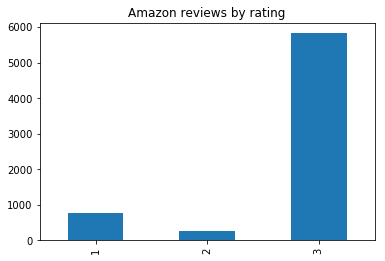

In [53]:
amazon_reviews.plot_by_rating(title='Amazon reviews by rating')

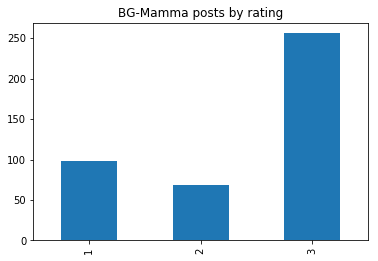

In [54]:
bg_mamma_posts.plot_by_rating(title='BG-Mamma posts by rating')

In [56]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(amazon_reviews.vector.tolist(), amazon_reviews.rating)
bg_mamma_posts.predict_rating(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

Да видим как се представя модела:

In [63]:
pd.crosstab(index=bg_mamma_posts.rating, columns=bg_mamma_posts.predicted_rating)

predicted_rating,1,2,3
rating,,,
1,31,8,59
2,18,6,45
3,59,16,181


In [64]:
from sklearn.metrics import accuracy_score, classification_report

print('Accuracy: ', accuracy_score(bg_mamma_posts.rating, bg_mamma_posts.predicted_rating))
print(classification_report(bg_mamma_posts.rating, bg_mamma_posts.predicted_rating))

Accuracy:  0.51536643026


Този резултат е доста лош, тъй като ако класифицираме всички ревюта с максимален рейтинг (3), ще получим accuracy от над 60%:

In [70]:
rating_counts = bg_mamma_posts.rating.value_counts()
print('Честота на срещане на рейтинг 3: ', rating_counts[3]/sum(rating_counts))

Честота на срещане на рейтинг 3:  0.605200945626


Можем да опитаме да приложим stemming при предварителната обработка на данните:

In [35]:
amazon_reviews.tokenize(stem=True)
vector_space = amazon_reviews.build_vector_space()
amazon_reviews.vectorize(vector_space=vector_space)

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(amazon_reviews.vector.tolist(), amazon_reviews.rating)

(bg_mamma_posts
 .tokenize(stem=True)
 .vectorize(vector_space=vector_space, tf_idf=amazon_reviews.tfidf())
 .predict_rating(knn)
 .head())

,post,rating,tokens,vector,predicted_rating
0,Най-любимия ми продукт на ЕЛ е серум ANR,3,"[my, laughabl, product, of, el, is, serum, anr]","[-0.8884340425332388, 0.9310904194911321, -0.5...",3
1,"От това, което съм ползвала от бялата козметик...",3,"[from, what, i'v, been, use, white, cosmet, an...","[-0.5360326518615087, 0.33436721687515575, -1....",3
2,Не си представям и ден Без серума Advance Nigh...,3,"[i, do, not, even, imagin, day, serum, advanc,...","[-0.3283296212553978, 0.7226738184690475, -0.9...",2
3,+ resiliance lift околоочния,3,"[+, resili, lift, eyebrow]","[-1.0550452768802643, 0.7050577700138092, -1.2...",3
4,Моят най-любим продукт е Idealist А от декорат...,3,"[my, lovabl, product, is, idealist, a, from, t...","[-0.7467351421713829, 0.8702313333749772, -0.6...",1


In [36]:
from sklearn.metrics import accuracy_score, classification_report

print('Accuracy: ', accuracy_score(bg_mamma_posts.rating, bg_mamma_posts.predicted_rating))
print(classification_report(bg_mamma_posts.rating, bg_mamma_posts.predicted_rating))

Accuracy:  0.524822695035
             precision    recall  f1-score   support

          1       0.27      0.29      0.28        98
          2       0.13      0.04      0.07        69
          3       0.65      0.75      0.69       256

avg / total       0.47      0.52      0.49       423



Не стана много по-добре.

## 4.2 Наивен Бейсов класификатор

Вторият подход, който ще изпорбвам е Наивен Бейсов класификатор. За целта ще изведем речник със всички срещани думи както в ревютата в Амазон, така и в постовете от БГ-Мама.

In [109]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


bg_mamma_posts = BGMammaReviews.get()
bg_mamma_posts.remove_irrelevant_posts()
bg_mamma_posts.translate()

amazon_reviews = AmazonReviews.get()
amazon_reviews = AmazonReviews(amazon_reviews.dropna())

amazon_reviews.round_ratings()
bg_mamma_posts.round_ratings()

all_reviews = pd.concat([amazon_reviews, bg_mamma_posts])
vocabulary = CountVectorizer().fit(all_reviews.post)
print(len(vocabulary.vocabulary_))

7692


Получихме речник от 7692 думи. Превръщаме всеки пост в 7692-мерен вектор. За трениране използваме sparse матрица от данните от Амазон.

In [110]:
amazon_sparse = vocabulary.transform(amazon_reviews.post)
bg_mamma_sparse = vocabulary.transform(bg_mamma_posts.post)

nb = MultinomialNB()
nb.fit(amazon_sparse, amazon_reviews.rating)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Вече имаме класификатор! Да видим какви резултати ще върне:

In [111]:
amazon_predictions = nb.predict(amazon_sparse)
print('Accuracy on train set: ', accuracy_score(amazon_reviews.rating, amazon_predictions))
print(classification_report(amazon_reviews.rating, amazon_predictions))

bg_mamma_predictions = nb.predict(bg_mamma_sparse)
print('Accuracy on test set: ', accuracy_score(bg_mamma_posts.rating, bg_mamma_predictions))
print(classification_report(bg_mamma_posts.rating, bg_mamma_predictions))

Accuracy on train set:  0.92701048951
             precision    recall  f1-score   support

          1       0.84      0.74      0.79       769
          2       0.67      0.08      0.14       266
          3       0.94      0.99      0.96      5829

avg / total       0.92      0.93      0.91      6864

Accuracy on test set:  0.486997635934
             precision    recall  f1-score   support

          1       0.28      0.48      0.36        98
          2       0.00      0.00      0.00        69
          3       0.67      0.62      0.64       256

avg / total       0.47      0.49      0.47       423



## 4.3 Логистична регресия

Ще опитаме и с логистична регресия. За нея ще използваме същите sparse матрици, които получихме при Наивния Бейсов класификатор. Ще тренирам три модела, всеки от които оценява вероятността за рейтинг 1,2 или 3. Крайната стойност за рейтинг ще е тази с най-голяма вероятност.

Първо ще разделим колоната рейтинг на 3 булеви колони - дали е 1, 2 или 3.

In [112]:
amazon_reviews['is_1'] = amazon_reviews.rating == 1
amazon_reviews['is_2'] = amazon_reviews.rating == 2
amazon_reviews['is_3'] = amazon_reviews.rating == 3

bg_mamma_posts['is_1'] = bg_mamma_posts.rating == 1
bg_mamma_posts['is_2'] = bg_mamma_posts.rating == 2
bg_mamma_posts['is_3'] = bg_mamma_posts.rating == 3

In [113]:
amazon_reviews.head()

,post,rating,is_1,is_2,is_3
0,Not sure if this was legit product...container...,1,True,False,False
1,This is the best sample from Estee Lauder. It'...,3,False,False,True
2,"Perfect size for air-plane travel, does the jo...",3,False,False,True
3,It's realy worked. My skine smooth and clean. ...,3,False,False,True
4,Feels so great on my face. I love the smell,3,False,False,True


In [114]:
bg_mamma_posts.head()

,post,rating,is_1,is_2,is_3
0,My favorite product of EL is serum ANR,3,False,False,True
1,From what I've been using white cosmetics and ...,3,False,False,True
2,I do not even imagine Day Serum Advance Night ...,3,False,False,True
3,+ resiliance lift eyebrow,3,False,False,True
4,My favorite product is Idealist A from the dec...,3,False,False,True


Тренираме трите класификатора:

In [115]:
from sklearn.linear_model import LogisticRegression

fitted_1 = LogisticRegression().fit(amazon_sparse, amazon_reviews['is_1'])
fitted_2 = LogisticRegression().fit(amazon_sparse, amazon_reviews['is_2'])
fitted_3 = LogisticRegression().fit(amazon_sparse, amazon_reviews['is_3'])

Предвиждаме вероятността за всеки клас рейтинг:

In [116]:
bg_mamma_posts['prob_is_1'] = fitted_1.predict_proba(bg_mamma_sparse)[:,1]
bg_mamma_posts['prob_is_2'] = fitted_2.predict_proba(bg_mamma_sparse)[:,1]
bg_mamma_posts['prob_is_3'] = fitted_3.predict_proba(bg_mamma_sparse)[:,1]

Избираме най-вероятния рейтинг:

In [117]:
def find_most_probable(post):
    probabilities = [post['prob_is_1'], post['prob_is_2'], post['prob_is_3']]
    return probabilities.index(max(probabilities)) + 1

bg_mamma_posts['prediction'] = bg_mamma_posts.apply(lambda post: find_most_probable(post), axis=1)
bg_mamma_posts.head()

,post,rating,is_1,is_2,is_3,prob_is_1,prob_is_2,prob_is_3,prediction
0,My favorite product of EL is serum ANR,3,False,False,True,0.017231,0.002269,0.983953,3
1,From what I've been using white cosmetics and ...,3,False,False,True,0.020410,0.001225,0.987237,3
2,I do not even imagine Day Serum Advance Night ...,3,False,False,True,0.198267,0.039166,0.570253,3
3,+ resiliance lift eyebrow,3,False,False,True,0.096814,0.054705,0.821754,3
4,My favorite product is Idealist A from the dec...,3,False,False,True,0.004931,0.005740,0.992901,3


Да видим как се справя този модел

In [118]:
print('Accuracy: ', accuracy_score(bg_mamma_posts.rating, bg_mamma_posts.prediction))
print(classification_report(bg_mamma_posts.rating, bg_mamma_posts.prediction))

Accuracy:  0.567375886525
             precision    recall  f1-score   support

          1       0.37      0.44      0.40        98
          2       0.26      0.23      0.25        69
          3       0.74      0.71      0.72       256

avg / total       0.57      0.57      0.57       423



По-добре!

----

От изпорбваните класификатори, логистичната регресия дава най-добри резултати. С нейна помощ можем да обобщим средната оценка за продуктите на *Estee Lauder*:

In [120]:
bg_mamma_posts.prediction.mean()

2.307328605200946

Да видим истинската оценка:

In [122]:
bg_mamma_posts.rating.mean()

2.3735224586288415

# 5. Заключение

Най-високата точност, която успяхме да постигнем с тези данни е 57%. Как можем да подобрим модела?
- можем да свалим повече данни, които не са обвързани само с един продукт, тъй като основен проблем е неравномерната им разпределеност
- да опитаме и с други класификатори
- да използваме NLP подходи за класификация на свободен текст